# New pipeline

In [1]:
import matplotlib.pyplot as plt
import cv2


import scipy

from pathlib import Path

import numpy as np

import h5py
import math


import pandas as pd

import holoviews as hv

import platform

import sys
sys.path.insert(0, "..")

from pathlib import Path

import cv2


from Utilities.Utils import *
from Utilities.Processing import *

In [2]:
# Get the DataFolder

if platform.system() == "Darwin":
    DataPath = Path("/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos")
# Linux Datapath
if platform.system() == "Linux":
    DataPath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos")

print(DataPath)

/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos


In [5]:
# Make a list of the folders I want to use
# For instance, I want to use the folders that have the "FeedingState" in the name

Folders = []
for folder in DataPath.iterdir():
    minfolder = str(folder).lower()
    if "tnt" in minfolder and "tracked" in minfolder and "pm" in minfolder:
    #if 'feedingstate' in minfolder:
        Folders.append(folder)

Folders
    

[PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230804_TNTscreen_PM_2_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230808_TNTscreen_PM_3_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230809_TNTscreen_PM_4_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230803_TNTscreen_PM_1_Videos_Tracked')]

In [6]:
import json

# Build a dataframe that will store the ball y positions and the arena and corridor numbers as metadata

Dataset = pd.DataFrame(columns=["Fly", "yball", "arena", "corridor"])

# Loop over all the .analysis.h5 files in the folder and store the ball y positions and the arena and corridor numbers as metadata

Flynum = 0
# Loop over all the foldes that don't have "Dark" in the name
for folder in Folders:
    # Read the metadata.json file
    with open(folder / "Metadata.json", "r") as f:
        metadata = json.load(f)
        variables = metadata["Variable"]
        metadata_dict = {}
        for var in variables:
            metadata_dict[var] = {}
            for arena in range(1, 10):
                arena_key = f"Arena{arena}"
                var_index = variables.index(var)
                metadata_dict[var][arena_key] = metadata[arena_key][var_index]
        
        print (metadata_dict)
        
    for file in folder.glob("**/*.analysis.h5"):
        #print(file)
        with h5py.File(file, "r") as f:
            dset_names = list(f.keys())
            locations = f["tracks"][:].T
            node_names = [n.decode() for n in f["node_names"][:]]

        locations.shape
        
        if "Flipped" in folder.name:
            yball[:, 0, 0] = -yball[:, 0, 0]

        else:
            yball : np.ndarray = locations[:, :, 1, :]
        
        # Get the filename from the path
        foldername = folder.name

        # Get the arena and corridor numbers from the parent (corridor) and grandparent (arena) folder names
        arena = file.parent.parent.name
        corridor = file.parent.name
        
        # Get the metadata for this arena
        arena_key = arena.capitalize()
        arena_metadata = {var: metadata_dict[var][arena_key] for var in metadata_dict}
        
        Flynum += 1
        
        # Store the ball y positions and the arena and corridor numbers as metadata
        data = {"Fly": "Fly" + str(Flynum),
                "yball": yball[:, 0, 0], 
                "experiment": foldername,
                "arena": arena, 
                "corridor": corridor}
        data.update(arena_metadata)
        Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)



{'Date': {'Arena1': '230804', 'Arena2': '230804', 'Arena3': '230804', 'Arena4': '230804', 'Arena5': '230804', 'Arena6': '230804', 'Arena7': '230804', 'Arena8': '230804', 'Arena9': '230804'}, 'Genotype': {'Arena1': 'TNTxTH', 'Arena2': 'TNTxE-PG', 'Arena3': 'TNTxMB247', 'Arena4': 'TNTxLAL1', 'Arena5': 'TNTxDDC', 'Arena6': 'PR', 'Arena7': 'Dnc', 'Arena8': 'rut', 'Arena9': 'TNTxLAL2'}, 'Period': {'Arena1': 'PM', 'Arena2': 'PM', 'Arena3': 'PM', 'Arena4': 'PM', 'Arena5': 'PM', 'Arena6': 'PM', 'Arena7': 'PM', 'Arena8': 'PM', 'Arena9': 'PM'}, 'FeedingState': {'Arena1': 'starved_noWater', 'Arena2': 'starved_noWater', 'Arena3': 'starved_noWater', 'Arena4': 'starved_noWater', 'Arena5': 'starved_noWater', 'Arena6': 'starved_noWater', 'Arena7': 'starved_noWater', 'Arena8': 'starved_noWater', 'Arena9': 'starved_noWater'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7': 'std', 'Arena8': 'std', 'Arena9': 'std'}, 'Light': {

/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{'Date': {'Arena1': '230808', 'Arena2': '230808', 'Arena3': '230808', 'Arena4': '230808', 'Arena5': '230808', 'Arena6': '230808', 'Arena7': '230808', 'Arena8': '230808', 'Arena9': '230808'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'TNTxMB247', 'Arena3': 'TNTxLAL1', 'Arena4': 'TNTxTH', 'Arena5': 'PR', 'Arena6': 'TNTxE-PG', 'Arena7': 'TNTxLAL2', 'Arena8': 'TNTxDDC', 'Arena9': 'PR'}, 'Period': {'Arena1': 'PM', 'Arena2': 'PM', 'Arena3': 'PM', 'Arena4': 'PM', 'Arena5': 'PM', 'Arena6': 'PM', 'Arena7': 'PM', 'Arena8': 'PM', 'Arena9': 'PM'}, 'FeedingState': {'Arena1': 'starved_noWater', 'Arena2': 'starved_noWater', 'Arena3': 'starved_noWater', 'Arena4': 'starved_noWater', 'Arena5': 'starved_noWater', 'Arena6': 'starved_noWater', 'Arena7': 'starved_noWater', 'Arena8': 'starved_noWater', 'Arena9': 'starved_noWater'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7': 'std', 'Arena8': 'std', 'Arena9': 'std'}, 'Light': {'A

/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{}


/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

{'Date': {'Arena1': '230803', 'Arena2': '230803', 'Arena3': '230803', 'Arena4': '230803', 'Arena5': '230803', 'Arena6': '230803', 'Arena7': '230803', 'Arena8': '230803', 'Arena9': '230803'}, 'Genotype': {'Arena1': 'rut', 'Arena2': 'TNTxLAL2', 'Arena3': 'TNTxDDC', 'Arena4': 'TNTxE-PG', 'Arena5': 'PR', 'Arena6': 'Dnc', 'Arena7': 'TNTxMB247', 'Arena8': 'TNTxTH', 'Arena9': 'TNTxLAL1'}, 'Period': {'Arena1': 'PM', 'Arena2': 'PM', 'Arena3': 'PM', 'Arena4': 'PM', 'Arena5': 'PM', 'Arena6': 'PM', 'Arena7': 'PM', 'Arena8': 'PM', 'Arena9': 'PM'}, 'FeedingState': {'Arena1': 'starved_noWater', 'Arena2': 'starved_noWater', 'Arena3': 'starved_noWater', 'Arena4': 'starved_noWater', 'Arena5': 'starved_noWater', 'Arena6': 'starved_noWater', 'Arena7': 'starved_noWater', 'Arena8': 'starved_noWater', 'Arena9': 'starved_noWater'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7': 'std', 'Arena8': 'std', 'Arena9': 'std'}, 'Light': {

/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_75484/4030965887.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(data, ignore_index=True).reset_index(drop=True)
/tmp/ipykern

In [7]:
# Unpack yball positions

Dataset = Dataset.explode("yball")

Dataset['Frame'] = Dataset.groupby('Fly').cumcount()

Dataset['time'] = Dataset['Frame'] / 30
#DataFrame['time'] = DataFrame.groupby(['experiment', 'arena', 'corridor']).cumcount() / 30

#DataFrame['Fly'] = 'Fly' + (DataFrame.groupby(['experiment', 'arena', 'corridor']).ngroup() + 1).astype(str)

Dataset.reset_index(drop=True, inplace=True)

Dataset.head()

,Fly,yball,arena,corridor,experiment,Date,Genotype,Period,FeedingState,Orientation,Light,Frame,time
0,Fly1,338.980011,arena2,corridor5,230804_TNTscreen_PM_2_Videos_Tracked,230804,TNTxE-PG,PM,starved_noWater,std,on,0,0.000000
1,Fly1,339.003754,arena2,corridor5,230804_TNTscreen_PM_2_Videos_Tracked,230804,TNTxE-PG,PM,starved_noWater,std,on,1,0.033333
2,Fly1,338.976898,arena2,corridor5,230804_TNTscreen_PM_2_Videos_Tracked,230804,TNTxE-PG,PM,starved_noWater,std,on,2,0.066667
3,Fly1,339.013611,arena2,corridor5,230804_TNTscreen_PM_2_Videos_Tracked,230804,TNTxE-PG,PM,starved_noWater,std,on,3,0.100000
4,Fly1,339.05072,arena2,corridor5,230804_TNTscreen_PM_2_Videos_Tracked,230804,TNTxE-PG,PM,starved_noWater,std,on,4,0.133333


In [8]:
# Replace all occurrences of "Fed" with "fed" in the 'FeedingState' column
Dataset['FeedingState'] = Dataset['FeedingState'].replace('Fed', 'fed')

# If there is 'Flipped' in the foldername, replace the correspondint 'Orientation' with 'flipped'


In [ ]:
Dataset.loc[Dataset['experiment'].str.contains('Flipped'), 'Orientation'] = 'flipped'

In [9]:
savepath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Datasets")
checksave(
    path=savepath.joinpath("230821_TNTScreen_4exps.feather"),
    object="dataframe",
    file=Dataset,
)

In [ ]:
savepath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Datasets")



In [ ]:
Dataset.head()

In [ ]:
# Compute the maximum time value for each fly
max_time = Dataset.groupby("Fly")["time"].max()

# Compute the number of rows for each fly
num_rows = Dataset.groupby("Fly").size()

# Display the results
print("Maximum time value for each fly:")
print(max_time)
print()
print("Number of rows for each fly:")
print(num_rows)


In [ ]:
# print each possible value of 'Fly'
print(Dataset['Fly'].unique())

In [10]:
#LightDataset = Dataset[Dataset['Light'] == 'on']

GroupedDF = Dataset.groupby(['Genotype','time',])['yball'].mean().reset_index()

GroupedDF.head()


,Genotype,time,yball
0,Dnc,0.000000,326.349607
1,Dnc,0.033333,326.490232
2,Dnc,0.066667,326.488894
3,Dnc,0.100000,326.359487
4,Dnc,0.133333,326.491501


In [ ]:
# Get all unique values of the column FeedingState
feeding_states = GroupedDF['FeedingState'].unique()

print(feeding_states)

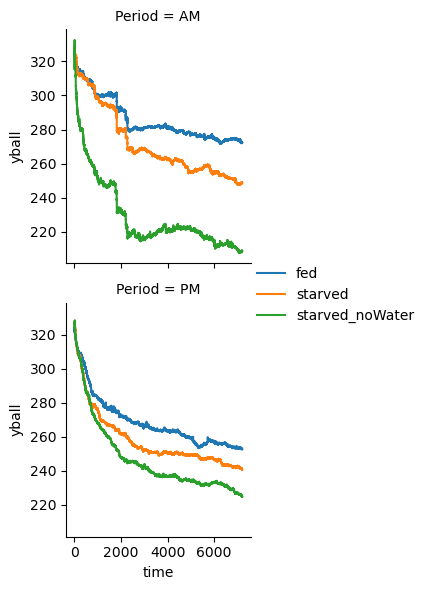

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid object with the 'Period' column as the row variable
g = sns.FacetGrid(data=GroupedDF, row='Period')

# Map a line plot of the 'yball' column over time to each facet, with the hue set to 'FeedingState'
g.map(sns.lineplot, 'time', 'yball', 'FeedingState')

# Add a legend to the plot
g.add_legend()

# Invert the y-axis of each Axes object in the FacetGrid
for ax in g.axes.flat:
    ax.invert_yaxis()

# Show the plot
plt.show()


In [ ]:
GroupedDF.head()

,Period,FeedingState,time,yball
0,AM,fed,0.000000,327.660701
1,AM,fed,0.033333,327.644418
2,AM,fed,0.066667,327.720067
3,AM,fed,0.100000,327.645315
4,AM,fed,0.133333,327.677930


In [ ]:
import matplotlib
print(sns.__version__)
print(matplotlib.__version__)

0.12.1
3.5.3


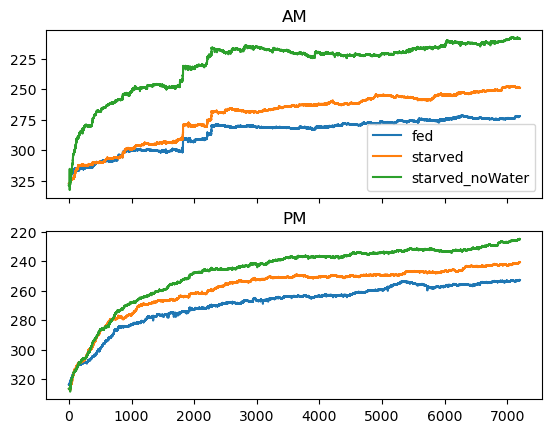

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, axes = plt.subplots(nrows=2, sharex=True)

# Plot the data for each period on a separate axis
for i, period in enumerate(GroupedDF['Period'].unique()):
    data = GroupedDF[GroupedDF['Period'] == period]
    for feeding_state in data['FeedingState'].unique():
        subset = data[data['FeedingState'] == feeding_state]
        axes[i].plot(subset['time'], subset['yball'], label=feeding_state)
    axes[i].set_title(period)
    axes[i].invert_yaxis()

# Add a legend to the first axis
axes[0].legend()

# Show the plot
plt.show()


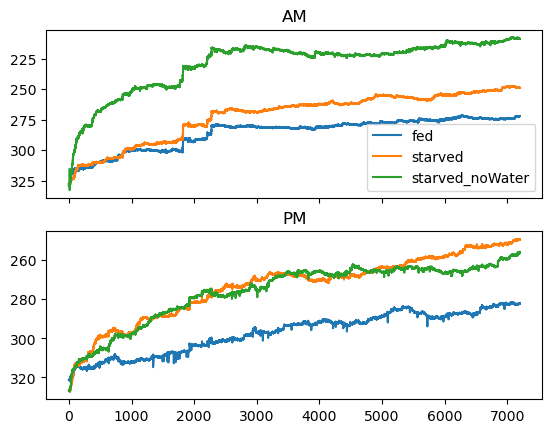

In [ ]:
import matplotlib.pyplot as plt

# Filter the data to only include rows where 'Light' == 'on'
GroupedDF = GroupedDF[GroupedDF['Light'] == 'on']

# Create a figure and axes
fig, axes = plt.subplots(nrows=2, sharex=True)

# Plot the data for each period on a separate axis
for i, period in enumerate(GroupedDF['Period'].unique()):
    data = GroupedDF[GroupedDF['Period'] == period]
    for feeding_state in data['FeedingState'].unique():
        subset = data[data['FeedingState'] == feeding_state]
        axes[i].plot(subset['time'], subset['yball'], label=feeding_state)
    axes[i].set_title(period)
    axes[i].invert_yaxis()

# Add a legend to the first axis
axes[0].legend()

# Show the plot
plt.show()


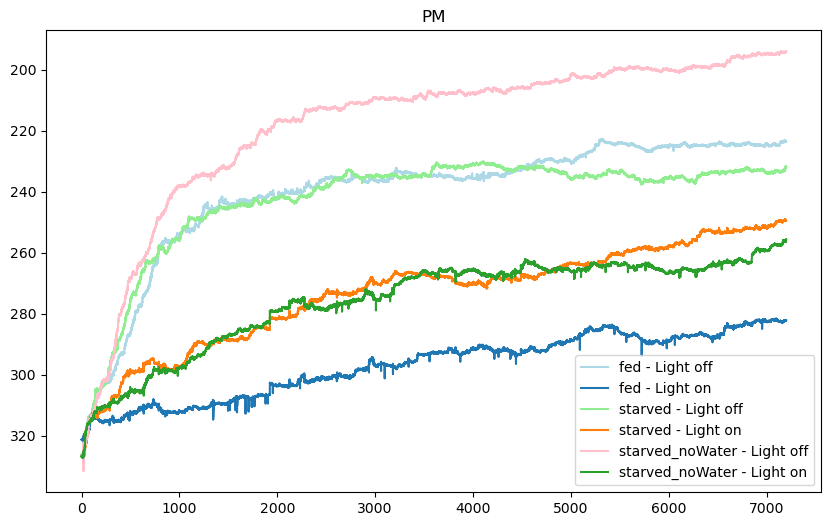

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each feeding state and light combination
colors = {('fed', 'on'): 'C0', ('fed', 'off'): 'lightblue',
          ('starved', 'on'): 'C1', ('starved', 'off'): 'lightgreen',
          ('starved_noWater', 'on'): 'C2', ('starved_noWater', 'off'): 'pink'}

# Plot the data for the PM period
data = GroupedDF[GroupedDF['Period'] == 'PM']
for feeding_state in data['FeedingState'].unique():
    subset = data[data['FeedingState'] == feeding_state]
    for light in subset['Light'].unique():
        subsubset = subset[subset['Light'] == light]
        linestyle = '-' if light == 'on' else '-'
        label = f'{feeding_state} - Light {light}'
        color = colors[(feeding_state, light)]
        ax.plot(subsubset['time'], subsubset['yball'], linestyle=linestyle, color=color, label=label)

# Set the title
ax.set_title('PM')
ax.invert_yaxis()

# Add a legend to the axis
ax.legend()

# Show the plot
plt.show()


In [ ]:
GroupedDF.head()

,Period,Light,FeedingState,time,yball
0,AM,on,fed,0.000000,327.660701
1,AM,on,fed,0.033333,327.644418
2,AM,on,fed,0.066667,327.720067
3,AM,on,fed,0.100000,327.645315
4,AM,on,fed,0.133333,327.677930


In [ ]:
from scipy import stats
import numpy as np

# Define a function to compute the confidence interval for a given array of values
def confint(x, alpha=0.05):
    # Check if the input array contains at least two values
    if len(x) < 2:
        # If not, return a tuple containing two nan values
        return (np.nan, np.nan)
    
    # Compute the mean and standard error of the mean
    mean = np.mean(x)
    sem = stats.sem(x)
    
    # Compute the confidence interval
    ci = stats.t.interval(1 - alpha, len(x) - 1, loc=mean, scale=sem)
    
    return ci

# Apply the confint function to each group of rows in your original dataframe
confint_df = DataFrame.groupby(['Period', 'time'])['yball'].apply(confint).reset_index()

# Rename the columns of the resulting dataframe
confint_df.columns = ['Period', 'time', 'yball_lower', 'yball_upper']

# Merge the resulting dataframe with your grouped dataframe
GroupedDF = pd.merge(GroupedDF, confint_df, on=['Period', 'time'], how='left')


In [ ]:
# Create a line plot of the 'yball' column over time, grouped by the 'Period' column
sns.lineplot(data=GroupedDF, x='time', y='yball', hue='Period')

# Add the confidence intervals to the plot
for period, group in GroupedDF.groupby('Period'):
    plt.fill_between(group['time'], group['yball_lower'], group['yball_upper'], alpha=0.1)

# Show the plot
plt.show()

In [ ]:
# Mutants

GroupedDF_TNT = Dataset.groupby(['Genotype','time',])['yball'].mean().reset_index()


In [15]:
# Calculate the sample size for each Genotype group based on the number of individual flies
sample_size = Dataset.groupby('Genotype')['Fly'].nunique()



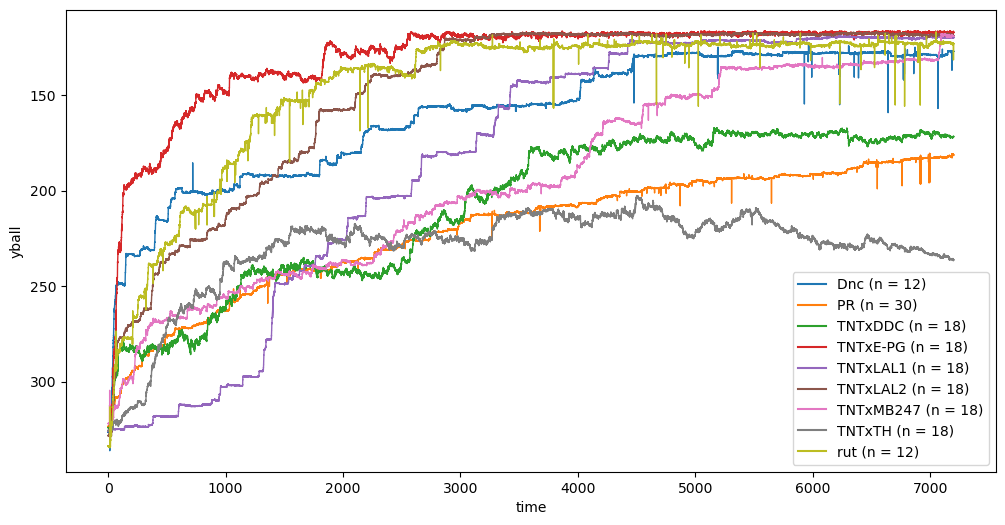

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a line plot of the 'yball' column over time, colored by the 'Genotype' column
sns.lineplot(data=GroupedDF, x='time', y='yball', hue='Genotype', linewidth=1)

# Invert the y-axis
plt.gca().invert_yaxis()

# Modify the labels of the legend to include the sample size for each Genotype group
legend = plt.legend()
for text, genotype in zip(legend.texts, sample_size.index):
    text.set_text(f'{genotype} (n = {sample_size[genotype]})')

# Show the plot
plt.show()

# Confints

In [18]:
Confints_BS = Dataset.groupby(['Genotype','time'])['yball'].apply(lambda x: draw_bs_ci(x, n_reps=300))


In [20]:

Confints_BS_Process = Confints_BS.reset_index()

In [22]:
# Split values of Confints_process["cumulated_success"] into two columns ci_lower and ci_upper
Confints_BS_Process[["ci_lower", "ci_upper"]] = pd.DataFrame(
    Confints_BS_Process["yball"].tolist(), index=Confints_BS_Process.index
)

GroupedDF["ci_lower"] = Confints_BS_Process["ci_lower"]
GroupedDF["ci_upper"] = Confints_BS_Process["ci_upper"]

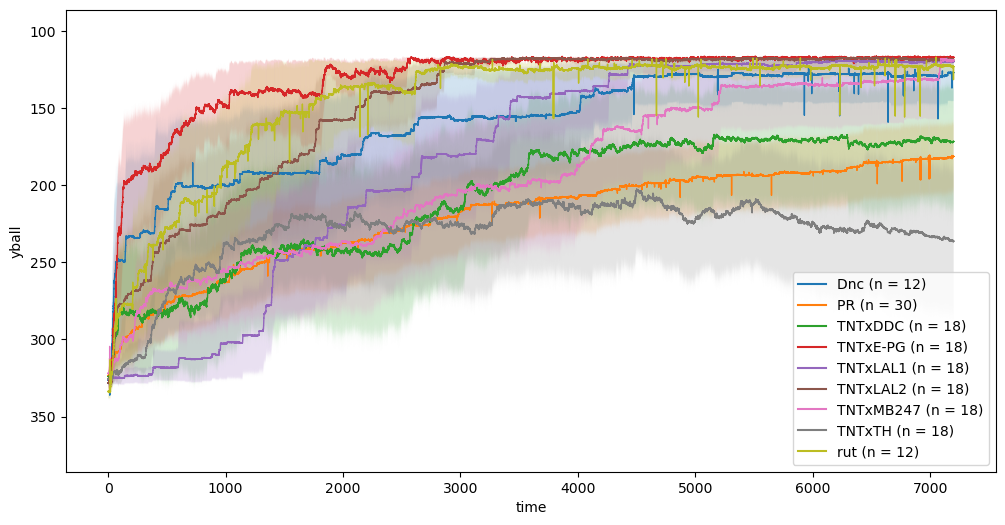

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a line plot of the 'yball' column over time, colored by the 'Genotype' column
sns.lineplot(data=GroupedDF, x='time', y='yball', hue='Genotype', linewidth=1)

# Add the confidence intervals to the plot
for genotype, data in GroupedDF.groupby('Genotype'):
    plt.fill_between(data['time'], data['ci_lower'], data['ci_upper'], alpha=0.2)

# Invert the y-axis
plt.gca().invert_yaxis()

# Modify the labels of the legend to include the sample size for each Genotype group
legend = plt.legend()
for text, genotype in zip(legend.texts, sample_size.index):
    text.set_text(f'{genotype} (n = {sample_size[genotype]})')

# Show the plot
plt.show()


In [28]:
SubGroup = GroupedDF[GroupedDF['Genotype'].isin(['TNTxTH', 'TNTxE-PG', 'PR'])]

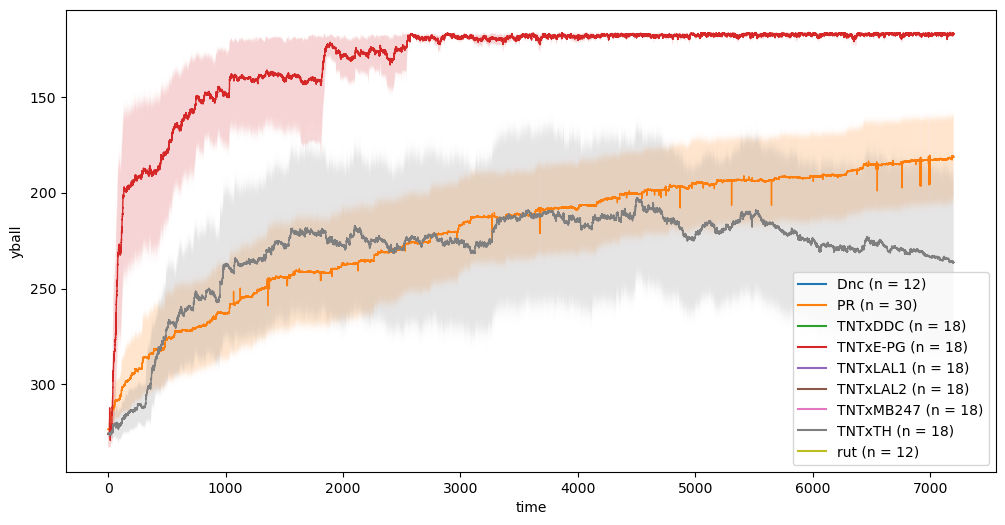

In [29]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a line plot of the 'yball' column over time, colored by the 'Genotype' column
sns.lineplot(data=SubGroup, x='time', y='yball', hue='Genotype', linewidth=1)

# Add the confidence intervals to the plot
for genotype, data in SubGroup.groupby('Genotype'):
    plt.fill_between(data['time'], data['ci_lower'], data['ci_upper'], alpha=0.2)

# Invert the y-axis
plt.gca().invert_yaxis()

# Modify the labels of the legend to include the sample size for each Genotype group
legend = plt.legend()
for text, genotype in zip(legend.texts, sample_size.index):
    text.set_text(f'{genotype} (n = {sample_size[genotype]})')

# Show the plot
plt.show()


In [25]:
GroupedDF.head()

,Genotype,time,yball,ci_lower,ci_upper
0,Dnc,0.000000,326.349607,323.107947,329.231633
1,Dnc,0.033333,326.490232,323.581868,329.642420
2,Dnc,0.066667,326.488894,323.451673,329.229383
3,Dnc,0.100000,326.359487,323.870368,329.580522
4,Dnc,0.133333,326.491501,323.154762,329.728965


In [26]:
GroupedDF['Genotype'] = GroupedDF['Genotype'].astype('category')

In [27]:
savepath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Datasets")
checksave(
    path=savepath.joinpath("230821_TNTScreen_4exps_GroupedDF.feather"),
    object="dataframe",
    file=Dataset,
)

# New Method for more efficient dataframes

In [31]:
# Make a list of the folders I want to use
# For instance, I want to use the folders that have the "FeedingState" in the name

Folders = []
for folder in DataPath.iterdir():
    minfolder = str(folder).lower()
    #if "tnt" in minfolder and "tracked" in minfolder and "pm" in minfolder:
    if 'feedingstate' in minfolder:
        Folders.append(folder)

Folders

[PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230704_FeedingState_1_PM_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230721_Feedingstate_4_PM_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230728_Feedingstate_PM_dark_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230705_FeedingState_2_AM_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230706_FeedingState_3_PM_Flipped_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230706_FeedingState_3_AM_Flipped_Videos_Tracked'),
 PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMaze

In [32]:
# Build a dataframe that will store the ball y positions and the arena and corridor numbers as metadata
Dataset = pd.DataFrame(columns=["Fly", "yball", "arena", "corridor"])

# Loop over all the .analysis.h5 files in the folder and store the ball y positions and the arena and corridor numbers as metadata
Flynum = 0
# Loop over all the foldes that don't have "Dark" in the name
for folder in Folders:
    print(f"Adding experiment {folder} to the dataset...")
    # Read the metadata.json file
    with open(folder / "Metadata.json", "r") as f:
        metadata = json.load(f)
        variables = metadata["Variable"]
        metadata_dict = {}
        for var in variables:
            metadata_dict[var] = {}
            for arena in range(1, 10):
                arena_key = f"Arena{arena}"
                var_index = variables.index(var)
                metadata_dict[var][arena_key] = metadata[arena_key][var_index]
        
        print (metadata_dict)
        
    for file in folder.glob("**/*.analysis.h5"):
        #print(file)
        with h5py.File(file, "r") as f:
            dset_names = list(f.keys())
            locations = f["tracks"][:].T
            node_names = [n.decode() for n in f["node_names"][:]]

        locations.shape
        
        if "Flipped" in folder.name:
            yball[:, 0, 0] = -yball[:, 0, 0]

        else:
            yball : np.ndarray = locations[:, :, 1, :]
        
        # Get the filename from the path
        foldername = folder.name

        # Get the arena and corridor numbers from the parent (corridor) and grandparent (arena) folder names
        arena = file.parent.parent.name
        corridor = file.parent.name
        
        # Get the metadata for this arena
        arena_key = arena.capitalize()
        arena_metadata = {var: pd.Categorical([metadata_dict[var][arena_key]]) for var in metadata_dict}
        
        Flynum += 1
        
        # Store the ball y positions and the arena and corridor numbers as metadata
        data = {"Fly": pd.Categorical(["Fly" + str(Flynum)]),
                "yball": yball[:, 0, 0], 
                "experiment": pd.Categorical([foldername]),
                "arena": pd.Categorical([arena]), 
                "corridor": pd.Categorical([corridor])}
        data.update(arena_metadata)
        
        # Use pandas.concat instead of DataFrame.append
        Dataset = pd.concat([Dataset, pd.DataFrame(data)], ignore_index=True)


Adding experiment /mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Videos/230704_FeedingState_1_AM_Videos_Tracked to the dataset...
{'Date': {'Arena1': '230704', 'Arena2': '230704', 'Arena3': '230704', 'Arena4': '230704', 'Arena5': '230704', 'Arena6': '230704', 'Arena7': '230704', 'Arena8': '230704', 'Arena9': '230704'}, 'Genotype': {'Arena1': 'PR', 'Arena2': 'PR', 'Arena3': 'PR', 'Arena4': 'PR', 'Arena5': 'PR', 'Arena6': 'PR', 'Arena7': 'PR', 'Arena8': 'PR', 'Arena9': 'PR'}, 'Period': {'Arena1': 'AM', 'Arena2': 'AM', 'Arena3': 'AM', 'Arena4': 'AM', 'Arena5': 'AM', 'Arena6': 'AM', 'Arena7': 'AM', 'Arena8': 'AM', 'Arena9': 'AM'}, 'FeedingState': {'Arena1': 'starved_noWater', 'Arena2': 'starved_noWater', 'Arena3': 'starved_noWater', 'Arena4': 'starved', 'Arena5': 'starved', 'Arena6': 'starved', 'Arena7': 'Fed', 'Arena8': 'Fed', 'Arena9': 'Fed'}, 'Orientation': {'Arena1': 'std', 'Arena2': 'std', 'Arena3': 'std', 'Arena4': 'std', 'Arena5': 'std', 'Arena6': 'std', 'Arena7

ValueError: All arrays must be of the same length

In [ ]:
# Unpack yball positions

Dataset = Dataset.explode("yball")

Dataset['Frame'] = Dataset.groupby('Fly').cumcount()

Dataset['time'] = Dataset['Frame'] / 30

Dataset.reset_index(drop=True, inplace=True)

Dataset.head()

In [ ]:
# Replace all occurrences of "Fed" with "fed" in the 'FeedingState' column
Dataset['FeedingState'] = Dataset['FeedingState'].replace('Fed', 'fed')

# If there is 'Flipped' in the foldername, replace the correspondint 'Orientation' with 'flipped'
Dataset.loc[Dataset['experiment'].str.contains('Flipped'), 'Orientation'] = 'flipped'

In [ ]:
savepath = Path("/mnt/labserver/DURRIEU_Matthias/Experimental_data/MultiMazeRecorder/Datasets")
checksave(
    path=savepath.joinpath("230821_TNTScreen_4exps_lightweight.feather"),
    object="dataframe",
    file=Dataset,
)

In [ ]:
# Compute bootstrapped confidence intervals with multi-threading and a global progress bar
Confints_BS = Dataset.groupby(['Genotype','time'])['yball'].apply(draw_bs_ci)